<img src="TP2_consigna.png" width="800px">

In [15]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

Implementar función create_gauss_filter

In [61]:
def create_gauss_filter(h, w, k_size=5, sigma=5):
    kernel_1d = cv.getGaussianKernel(ksize=k_size, sigma=sigma) 
    kernel_2d = kernel_1d * kernel_1d.T
    
    # Crea una matriz de ceros con las dimensiones que la imagen
    kernel_wpadding = np.zeros((h, w))
    # Calcula la posición inicial para centrar el filtro en la matriz de ceros
    inicio_alto = (h  - k_size) // 2
    inicio_ancho = (w  - k_size) // 2
    # Coloca el filtro en el centro de la matriz grande
    kernel_wpadding[inicio_alto:inicio_alto+k_size, inicio_ancho:inicio_ancho+k_size] = kernel_2d
    
    kernel_fft = np.fft.fft2(kernel_wpadding)
    
    return kernel_wpadding,kernel_fft

1. Aplicamos filtro y graficamos para 4 valores diferentes de sigma, y comparamos versus el filtrado espacial.

In [74]:
def probar_sigmas(img, k_size=5, sigma=5):
    h, w = img.shape
    kernel, kernel_tf = create_gauss_filter(h, w, k_size, sigma)
    img_fft = np.fft.fft2(img)
    filtered = img_fft * kernel_tf
    img_gauss_fft = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

    img_gauss= cv.GaussianBlur(img, ksize=(k_size, k_size), sigmaX=sigma,  sigmaY=sigma)

    kernel_tf_shifted = np.fft.fftshift(kernel_tf)
    return sigma,kernel, kernel_tf_shifted,img_gauss_fft,img_gauss

<function matplotlib.pyplot.show(close=None, block=None)>

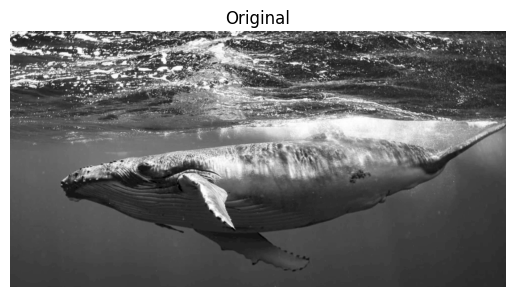

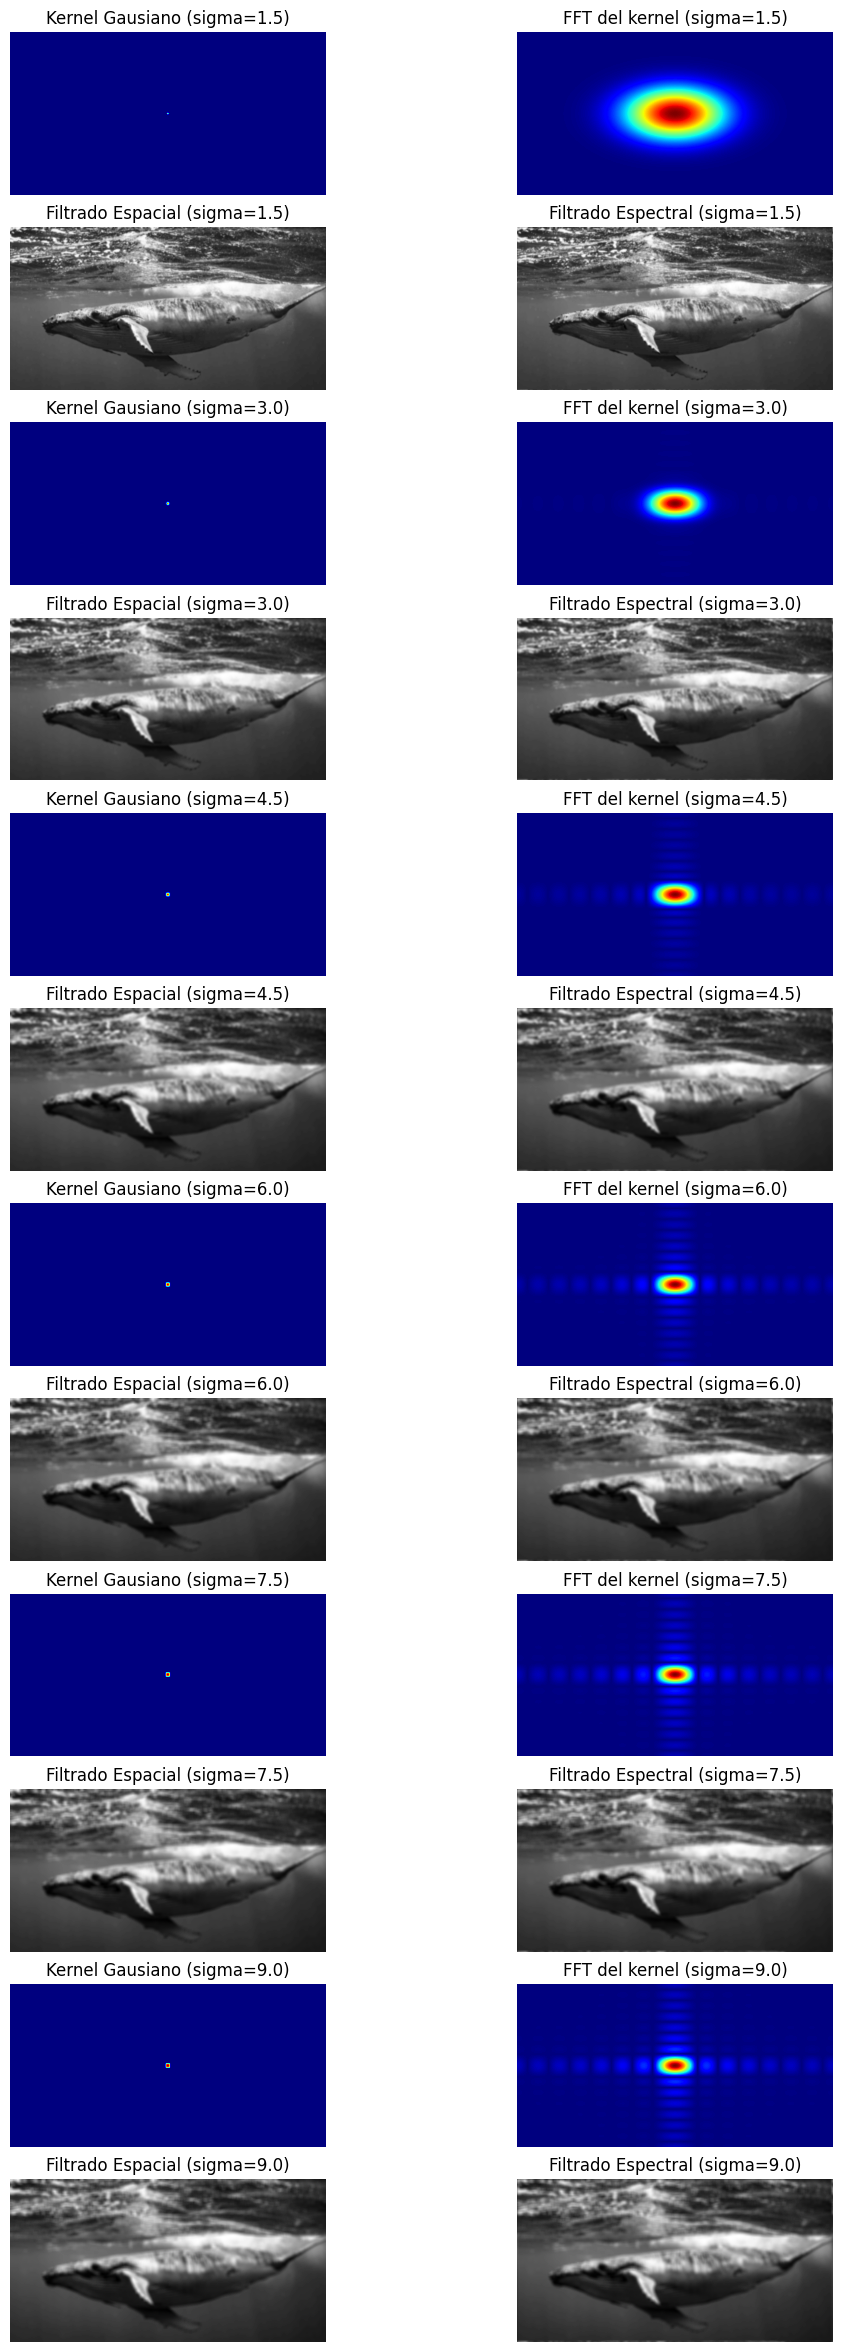

In [96]:
img_orig = cv.imread('ballena.png', cv.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(img_orig, cmap='gray')
plt.axis('off')
plt.title("Original")
plt.show

imagenes_prueba=[]
sigmas=[]

plt.figure(figsize=(12,30))
for i in np.arange(0,6):
    sigma,kernel, kernel_tf_shifted,img_gauss_fft,img_gauss = probar_sigmas(img_orig, k_size=15, sigma=(i+1)*1.5)
    plt.subplot(12,2,i*4+1)
    plt.axis('off')
    plt.title(f'Kernel Gausiano (sigma={sigma})')
    plt.imshow(kernel, cmap='jet')
    plt.subplot(12,2,i*4+2)
    plt.axis('off')
    plt.title(f'FFT del kernel (sigma={sigma})')
    plt.imshow(np.abs(kernel_tf_shifted), cmap='jet')
    plt.subplot(12,2,i*4+3)
    plt.axis('off')
    plt.imshow(img_gauss, cmap='gray')
    plt.title(f'Filtrado Espacial (sigma={sigma})')
    plt.subplot(12,2,i*4+4)
    plt.axis('off')
    plt.imshow(img_gauss_fft, cmap='gray')
    plt.title(f'Filtrado Espectral (sigma={sigma})')

    sigmas.append(sigma)
    imagenes_prueba.append([img_gauss_fft,img_gauss])
    #print(sigma)
plt.show


2. Comparar las dos formas de filtrado usando el método descrito en el paper.

<img src="image_quality_measure.png" width="800px">

In [93]:
def image_quality(img):
    h, w = img.shape
    variable_F = np.fft.fft2(img)
    variable_Fc = np.fft.ifftshift(variable_F)
    variable_AF=np.abs(variable_Fc)
    variable_M=np.max(variable_AF)
    variable_Th=np.sum(variable_AF>(variable_M/1000))
    img_quality=variable_Th/(h*w)
    return img_quality

In [112]:
print(sigmas)

quality_original=[]
quality_espectral=[]
quality_espacial=[]

for i in np.arange(0,len(sigmas)):
    quality_original.append(image_quality(img_orig))
    quality_espectral.append(image_quality(imagenes_prueba[i][0]))
    quality_espacial.append(image_quality(imagenes_prueba[i][1]))

print(quality_original)
print(quality_espectral)
print(quality_espacial)

[1.5, 3.0, 4.5, 6.0, 7.5, 9.0]
[0.02366993922393642, 0.02366993922393642, 0.02366993922393642, 0.02366993922393642, 0.02366993922393642, 0.02366993922393642]
[0.01314477170017142, 0.0074972728689418735, 0.005711391616019947, 0.005112981143836684, 0.004876110331930809, 0.0047327411563035686]
[0.013397226118123735, 0.007787127941405641, 0.005995013246065139, 0.0054059529375097394, 0.005215832943743182, 0.005050646719650927]


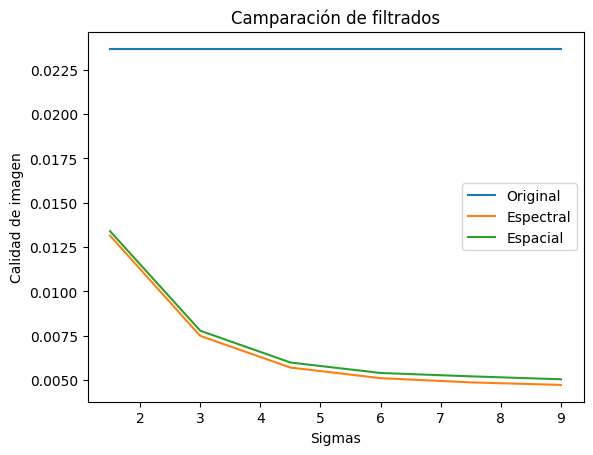

In [115]:
# Crear un gráfico de líneas para cada serie de datos
plt.plot(sigmas, quality_original, label='Original')
plt.plot(sigmas, quality_espectral, label='Espectral')
plt.plot(sigmas, quality_espacial, label='Espacial')

# Añadir leyenda
plt.legend()

# Añadir título y etiquetas a los ejes
plt.title('Camparación de filtrados')
plt.xlabel('Sigmas')
plt.ylabel('Calidad de imagen')

# Mostrar el gráfico
plt.show()

Las dos formas de filtrar dan resultados bastante similares.